# 宏观车辆产量相关度分析

- 整理 data.stats.gov.cn 原始数据, 增补残缺
- 输出为 csv
- 导入 S1 原始数据
- 并入特征集, 进行相关热力图观察


In [8]:
import pandas as pd
print(pd.__version__)
import numpy as np
import matplotlib.pyplot as plt
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

import datetime

0.22.0


## data.stats.gov.cn 清洗


In [9]:
ls -1 ../../raw/_macroeconomic/_abt/

#90.csv
#93.csv
#97.csv
24种数值-1712--1302.csv
37种数值-1712--1302.csv
37种数值-1712--1302.xls
6种数值--1802.csv
6种数值--1802.xls
car产量--36m.xls
car产量-15--11.xls
car产量-18--11.csv
car产量-18--11.xls
curl.sh*


In [10]:
df = pd.read_csv('../../raw/_macroeconomic/_abt/car产量-18--11.csv')
df.head()

,时间,基本型乘用车（轿车）产量_累计值(万辆)
0,2017年12月,1199.0
1,2017年11月,1073.7
2,2017年10月,948.4
3,2017年9月,900.9
4,2017年8月,731.4


In [11]:
# 时间 ->yyyymm 格式
df['时间'] = df['时间'].apply(lambda x:datetime.datetime.strptime(x , "%Y年%m月").strftime('%Y%m'))
len(df['时间'])

83

In [12]:
# 是否有空值
df.isnull().any()

时间                      False
基本型乘用车（轿车）产量_累计值(万辆)     True
dtype: bool

In [13]:
redf=df.rename(columns={'时间':'month'
        , '基本型乘用车（轿车）产量_累计值(万辆)':'car_month_output_addup'
        })

In [14]:
def _fix4nan2mon(df1s):
    for i in range(len(df1s)):
        #print(redf['1801c'][i])
        if np.isnan(df1s[i]):# == np.nan:
            _mean = (df1s[i-1] + df1s[i+1])/2
            print('NaN {} {} ->{}'.format(
                        df1s[i-1]
                        , df1s[i+1]
                        , _mean
                        ))
            df1s[i] = _mean
    return df1s
_fix4nan2mon(redf['car_month_output_addup'])
redf.isnull().any()

NaN 188.5 1223.8 ->706.15
NaN 176.1 1169.8 ->672.9499999999999
NaN 204.1 1253.1 ->728.5999999999999
NaN 206.9 1330.1 ->768.5
NaN 192.2 1119.1 ->655.65
NaN 159.6 1045.0 ->602.3


month                     False
car_month_output_addup    False
dtype: bool

In [17]:
redf.tail()

,month,car_month_output_addup
78,201106,507.8
79,201105,422.9
80,201104,347.4
81,201103,266.2
82,201102,167.0


In [24]:
#redf.iloc[:-11,:]

> csv 导出复用...

In [22]:
_csv = '../../raw/_macroeconomic/_abt/car_month_output_addup.csv'
redf.iloc[:-11,:].to_csv(_csv)
print('exp. => %s'% _csv)

exp. => ../../raw/_macroeconomic/_abt/car_month_output_addup.csv


## S1 数据加载-合并-观察


In [23]:
df_car4mout = redf.iloc[:-11,:]
df_car4mout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
month                     72 non-null object
car_month_output_addup    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [28]:
# S1 EDA
df_train = pd.read_csv('../../raw/CarsSaleForecast/[new] yancheng_train_20171226.csv')
df_test = pd.read_csv('../../raw/CarsSaleForecast/yancheng_testA_20171225.csv')

In [41]:
df_train.tail()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track
20152,201607,810398,10,750,2,2,1,4,5,MT,...,155,4282,1706,1475,1600,1120,5,2603,1460,1500
20153,201607,175962,126,750,3,2,1,4,6,AT,...,155,4473,1706,1469,1635,1155,5,2603,1460,1500
20154,201607,395234,9,841,3,2,2,6,6,AT,...,200,4805,1860,1458,2065,1580,5,2815,1584,1551
20155,201608,587678,194,537,2,1,3,5,0,CVT,...,169,4294,1772,1605,1770,1302,5,2610,1535,1540
20156,201608,248352,218,831,3,2,3,3,4,AT,...,135,4370,1700,1460,1500,1083,5,2570,1511,1515


In [43]:
len(df_train['sale_date'])

20157

In [53]:
pd.value_counts(df_train['sale_date'], sort=True)

201709    406
201708    400
201707    389
201706    387
201612    387
201705    386
201512    384
201703    384
201501    384
201511    383
201601    378
201509    375
201502    374
201704    373
201510    370
201603    369
201701    369
201611    368
201602    356
201610    354
201505    352
201702    351
201508    350
201506    350
201507    349
201409    348
201412    347
201503    343
201410    342
201604    337
         ... 
201406    267
201401    260
201404    256
201403    240
201311    235
201310    235
201402    230
201309    225
201312    221
201308    218
201301    213
201307    211
201710    207
201306    195
201305    193
201304    192
201302    188
201209    187
201211    184
201210    183
201212    183
201303    178
201207    176
201208    172
201201    171
201203    168
201205    166
201206    159
201204    156
201202    153
Name: sale_date, Length: 70, dtype: int64

In [29]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #f or some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


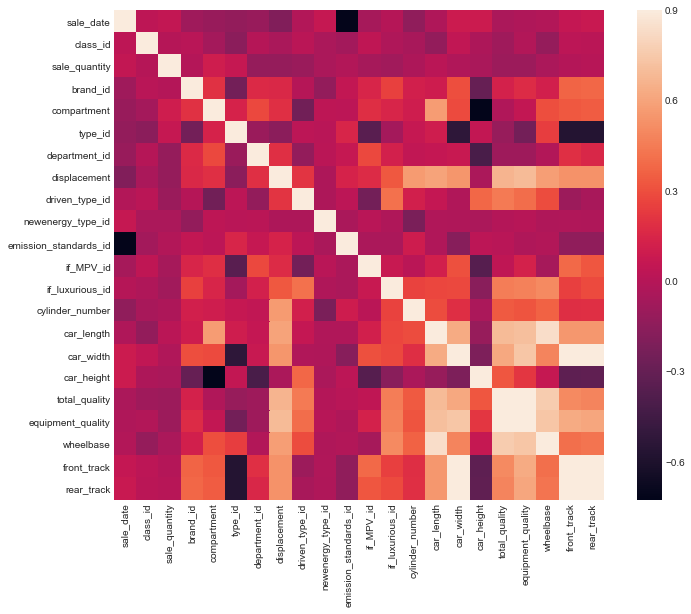

In [30]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

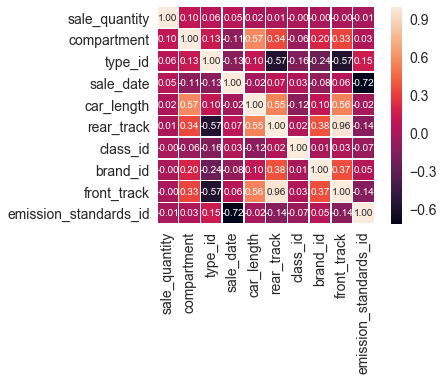

In [50]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'sale_quantity')['sale_quantity'].index
cm = np.corrcoef(df_train[cols].values.T)
#sns.set(font_scale=1.25)
sns.set(font_scale=1.4)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True
                 , fmt='.2f'
                 , linewidths=.5
                 , annot_kws={'size': 10}
                 , yticklabels=cols.values
                 , xticklabels=cols.values)
plt.show()

In [44]:
corrmat.tail()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,department_id,displacement,driven_type_id,newenergy_type_id,...,if_luxurious_id,cylinder_number,car_length,car_width,car_height,total_quality,equipment_quality,wheelbase,front_track,rear_track
total_quality,-0.035,-0.084,-0.094,0.128,-0.019,-0.116,-0.091,0.667,0.448,-0.004,...,0.458,0.335,0.693,0.615,0.324,1.000,0.960,0.761,0.503,0.482
equipment_quality,-0.022,-0.012,-0.094,0.170,0.055,-0.245,-0.089,0.695,0.402,0.009,...,0.473,0.318,0.713,0.736,0.219,0.960,1.000,0.736,0.627,0.609
wheelbase,-0.011,-0.121,-0.040,0.116,0.299,0.244,-0.009,0.580,0.295,-0.025,...,0.505,0.366,0.841,0.484,0.062,0.761,0.736,1.000,0.405,0.429
front_track,0.060,0.025,-0.003,0.369,0.332,-0.568,0.194,0.532,-0.093,-0.016,...,0.247,0.187,0.557,0.939,-0.331,0.503,0.627,0.405,1.000,0.961
rear_track,0.075,0.023,0.007,0.379,0.343,-0.567,0.151,0.535,-0.052,-0.022,...,0.286,0.193,0.552,0.908,-0.325,0.482,0.609,0.429,0.961,1.000


In [45]:
len(corrmat['sale_date'])

22